# PPD534 Final Project
   
   
 


### Urban research question: Is there relationship between health issues and food_access? Also, what are other variables that are realted?

(1) an initial set of descriptive statistics about your variables of interest
(2) some exploratory analysis
(3) data visualizations showing any relevant distributions, comparisons, and/or correlations
(4) a statistical model, such as a difference-of- means test, or a linear regression model

 Create four (4) or more Seaborn data visualizations, such as scatter plots, bar charts, line graphs, etc. Please use at least two kinds of data visualization. For this assignment only, maps will not be considered a type of data visualization. Format these Seaborn data visualizations using sns.set_context(‘paper’). Hint: Histograms and bar plots are technically different types of data visualization, but you must be certain that you are using the correct type for the right purpose.
› Create three (3) or more maps or cartograms, including at least one (1) choropleth map.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Initial set of descriptive statistics about your variables of interest

Our team checked the descriptive statistics of all the variables we will use through out the research
1. White Population
2. BIPOC Population
3. Income
4. Food Access
4. Health - Diabetes, High Cholesterol, Obesity

In [2]:
#we will merge every data variables into one data set
data=pd.DataFrame()

In [3]:
health_data=pd.read_csv('Data/healthdata2020_1.csv')
race_data=pd.read_csv('Data/racedata2020_1.csv')
income_data=pd.read_csv('Data/2020_Median_Household_Income_Calculations.csv')
food_access=pd.read_csv('Data/LA_County_FoodAccess.csv')
grocery_data=pd.read_csv('Data/Grocery_Store_Access__LA_.csv') #for mapping
la_boundary=gpd.read_file('Data/City_Boundary/City_Boundary.shp') #for mapping

## Data Cleaning

In [4]:
race_data['GEOID20'] = race_data['GEOID20'].astype('string')
race_data['GEOID20'] = '0' + race_data['GEOID20']
health_data['GEOID20'] = health_data['GEOID20'].astype('string')
health_data['GEOID20'] = '0' + health_data['GEOID20']
income_data['GEOID20'] = income_data['CensusTract'].astype('string')
income_data['GEOID20'] = '0' + income_data['GEOID20']
food_access['GEOID20'] = food_access['CensusTract'].astype('string')
food_access['GEOID20'] = '0' + food_access['GEOID20']

In [5]:
ct_CA2020 = gpd.read_file('Data/tl_2020_06037_tract20/tl_2020_06037_tract20.shp')

In [6]:
#filtering to LA City Census Tracts
North_LA = '060371'
South_LA = '060372'
ct_lacity2020 = ct_CA2020[ct_CA2020['GEOID20'].str.startswith(North_LA) | ct_CA2020['GEOID20'].str.startswith(South_LA)]

In [7]:
race_data=gpd.GeoDataFrame(ct_lacity2020.merge(race_data, on='GEOID20'))
health_data=gpd.GeoDataFrame(ct_lacity2020.merge(health_data, on='GEOID20'))
income_data=gpd.GeoDataFrame(ct_lacity2020.merge(income_data, on='GEOID20'))
food_access=gpd.GeoDataFrame(ct_lacity2020.merge(food_access, on='GEOID20'))

In [8]:
race_data

STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20    NAMELSAD20  \
0           06        037    101110  06037101110  1011.10  Census Tract   
1           06        037    101122  06037101122  1011.22  Census Tract   
2           06        037    101220  06037101220  1012.20  Census Tract   
3           06        037    101221  06037101221  1012.21  Census Tract   
4           06        037    101222  06037101222  1012.22  Census Tract   
...        ...        ...       ...          ...      ...           ...   
1096        06        037    297400  06037297400     2974  Census Tract   
1097        06        037    297501  06037297501  2975.01  Census Tract   
1098        06        037    297502  06037297502  2975.02  Census Tract   
1099        06        037    297601  06037297601  2976.01  Census Tract   
1100        06        037    297602  06037297602  2976.02  Census Tract   

     MTFCC20 FUNCSTAT20  ALAND20  AWATER20  ... P1_067N P1_067NA P1_068N  \
0      G5020          S  1142401         0  ...       0      NaN       0   
1      G5020          S  2644045         0  ...       0      NaN       0   
2      G5020          S   698886         0  ...       0      NaN       0   
3      G5020          S   354178         0  ...       0      NaN       0   
4      G5020          S   296512         0  ...       0      NaN       0   
...      ...        ...      ...       ...  ...     ...      ...     ...   
1096   G5020          S  2092347    955977  ...       0      NaN       0   
1097   G5020          S  1132151   2159171  ...       0      NaN       0   
1098   G5020          S   961341       476  ...       0      NaN       0   
1099   G5020          S   771120   1781231  ...       0      NaN       0   
1100   G5020          S   622070         0  ...       0      NaN       0   

     P1_068NA P1_069N  P1_069NA  P1_070N  P1_070NA  P1_071N  P1_071NA  
0         NaN       0       NaN        0       NaN        0       NaN  
1         NaN       0       NaN        0       NaN        0       NaN  
2         NaN       0       NaN        0       NaN        0       NaN  
3         NaN       0       NaN        0       NaN        0       NaN  
4         NaN       0       NaN        0       NaN        0       NaN  
...       ...     ...       ...      ...       ...      ...       ...  
1096      NaN       0       NaN        0       NaN        0       NaN  
1097      NaN       0       NaN        0       NaN        0       NaN  
1098      NaN       0       NaN        0       NaN        0       NaN  
1099      NaN       0       NaN        0       NaN        0       NaN  
1100      NaN       0       NaN        0       NaN        0       NaN  

[1101 rows x 157 columns]

In [9]:
income_data

STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20    NAMELSAD20  \
0           06        037    101110  06037101110  1011.10  Census Tract   
1           06        037    101122  06037101122  1011.22  Census Tract   
2           06        037    101220  06037101220  1012.20  Census Tract   
3           06        037    101221  06037101221  1012.21  Census Tract   
4           06        037    101222  06037101222  1012.22  Census Tract   
...        ...        ...       ...          ...      ...           ...   
1096        06        037    297400  06037297400     2974  Census Tract   
1097        06        037    297501  06037297501  2975.01  Census Tract   
1098        06        037    297502  06037297502  2975.02  Census Tract   
1099        06        037    297601  06037297601  2976.01  Census Tract   
1100        06        037    297602  06037297602  2976.02  Census Tract   

     MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20    INTPTLON20  \
0      G5020          S  1142401         0  +34.2594737  -118.2929869   
1      G5020          S  2644045         0  +34.2677213  -118.2901465   
2      G5020          S   698886         0  +34.2516083  -118.2816328   
3      G5020          S   354178         0  +34.2543290  -118.2925767   
4      G5020          S   296512         0  +34.2513519  -118.2885261   
...      ...        ...      ...       ...          ...           ...   
1096   G5020          S  2092347    955977  +33.7208388  -118.3228117   
1097   G5020          S  1132151   2159171  +33.7107078  -118.3025064   
1098   G5020          S   961341       476  +33.7155921  -118.2963264   
1099   G5020          S   771120   1781231  +33.7088571  -118.2869206   
1100   G5020          S   622070         0  +33.7159024  -118.2903209   

                                               geometry     geoid  \
0     POLYGON ((-118.30229 34.25870, -118.30091 34.2...  1400000U   
1     POLYGON ((-118.30334 34.27371, -118.30330 34.2...  1400000U   
2     POLYGON ((-118.28592 34.25227, -118.28592 34.2...  1400000U   
3     POLYGON ((-118.29945 34.25598, -118.29792 34.2...  1400000U   
4     POLYGON ((-118.29434 34.25233, -118.29318 34.2...  1400000U   
...                                                 ...       ...   
1096  POLYGON ((-118.33491 33.71662, -118.33308 33.7...  1400000U   
1097  POLYGON ((-118.31142 33.71384, -118.31115 33.7...  1400000U   
1098  POLYGON ((-118.30343 33.72158, -118.30123 33.7...  1400000U   
1099  POLYGON ((-118.29287 33.70296, -118.29281 33.7...  1400000U   
1100  POLYGON ((-118.29286 33.72110, -118.29285 33.7...  1400000U   

      CensusTract  year  denom_total_hh  med_hh_inc_adj  med_hh_inc  
0      6037101110  2020            1505         74625.0     74625.0  
1      6037101122  2020            1341         93125.0     93125.0  
2      6037101220  2020            1430         55682.0     55682.0  
3      6037101221  2020            1513         46274.0     46274.0  
4      6037101222  2020             969         30016.0     30016.0  
...           ...   ...             ...             ...         ...  
1096   6037297400  2020            1669         70729.0     70729.0  
1097   6037297501  2020            1110        120577.0    120577.0  
1098   6037297502  2020             996         80109.0     80109.0  
1099   6037297601  2020            1271         59047.0     59047.0  
1100   6037297602  2020            1650         78276.0     78276.0  

[1101 rows x 19 columns]

In [10]:
health_data

STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20    NAMELSAD20  \
0          06        037    101110  06037101110  1011.10  Census Tract   
1          06        037    101122  06037101122  1011.22  Census Tract   
2          06        037    101220  06037101220  1012.20  Census Tract   
3          06        037    101300  06037101300     1013  Census Tract   
4          06        037    101400  06037101400     1014  Census Tract   
..        ...        ...       ...          ...      ...           ...   
869        06        037    297202  06037297202  2972.02  Census Tract   
870        06        037    297300  06037297300     2973  Census Tract   
871        06        037    297400  06037297400     2974  Census Tract   
872        06        037    297601  06037297601  2976.01  Census Tract   
873        06        037    297602  06037297602  2976.02  Census Tract   

    MTFCC20 FUNCSTAT20  ALAND20  AWATER20  ... PHLTH_Crude95CI  \
0     G5020          S  1142401         0  ...    (12.0, 14.6)   
1     G5020          S  2644045         0  ...    ( 9.4, 11.6)   
2     G5020          S   698886         0  ...    (13.2, 15.7)   
3     G5020          S  2580478         0  ...    (10.5, 13.2)   
4     G5020          S  6310056         0  ...    (11.3, 14.0)   
..      ...        ...      ...       ...  ...             ...   
869   G5020          S   575787         0  ...    (10.8, 12.9)   
870   G5020          S  1231963   1164971  ...    ( 9.5, 11.4)   
871   G5020          S  2092347    955977  ...    ( 9.7, 12.7)   
872   G5020          S   771120   1781231  ...    ( 9.8, 11.7)   
873   G5020          S   622070         0  ...    (10.2, 12.6)   

    SLEEP_CrudePrev SLEEP_Crude95CI STROKE_CrudePrev STROKE_Crude95CI  \
0              36.8    (35.7, 37.9)              3.0     ( 2.7,  3.3)   
1              34.4    (33.2, 35.5)              2.5     ( 2.2,  2.7)   
2              36.9    (35.7, 38.0)              3.3     ( 3.0,  3.6)   
3              33.2    (31.9, 34.5)              3.0     ( 2.7,  3.4)   
4              34.8    (33.4, 36.0)              3.1     ( 2.8,  3.5)   
..              ...             ...              ...              ...   
869            35.1    (33.9, 36.1)              2.8     ( 2.5,  3.1)   
870            33.5    (32.5, 34.4)              2.6     ( 2.4,  3.0)   
871            29.9    (28.5, 31.2)              3.4     ( 3.0,  4.0)   
872            36.0    (34.8, 37.2)              2.4     ( 2.2,  2.6)   
873            34.5    (33.3, 35.7)              2.7     ( 2.4,  3.0)   

     TEETHLOST_CrudePrev TEETHLOST_Crude95CI  \
0                   12.4        ( 8.6, 17.0)   
1                    7.1        ( 5.0,  9.9)   
2                   14.0        ( 9.6, 18.9)   
3                    8.2        ( 5.5, 12.0)   
4                   10.5        ( 6.6, 15.2)   
..                   ...                 ...   
869                 10.1        ( 6.9, 14.2)   
870                  8.1        ( 5.5, 11.8)   
871                  6.5        ( 3.9, 10.5)   
872                  7.8        ( 5.5, 10.6)   
873                  8.2        ( 5.3, 12.5)   

                          Geolocation   Latitude   Longitude  
0    (34.25947361240, -118.292986888)  34.259474 -118.292987  
1    (34.26772153810, -118.290147139)  34.267722 -118.290147  
2    (34.25160849200, -118.281632269)  34.251608 -118.281632  
3    (34.24877812610, -118.270998916)  34.248778 -118.270999  
4    (34.24285302210, -118.294164132)  34.242853 -118.294164  
..                                ...        ...         ...  
869  (33.72473495030, -118.299007343)  33.724735 -118.299007  
870  (33.72082084090, -118.311598594)  33.720821 -118.311599  
871  (33.72513633000, -118.321440082)  33.725136 -118.321440  
872  (33.71322339010, -118.287494137)  33.713223 -118.287494  
873  (33.71590256890, -118.290320864)  33.715903 -118.290321  

[874 rows x 77 columns]

In [11]:
food_access

STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20    NAMELSAD20  \
0          06        037    101110  06037101110  1011.10  Census Tract   
1          06        037    101122  06037101122  1011.22  Census Tract   
2          06        037    101220  06037101220  1012.20  Census Tract   
3          06        037    101300  06037101300     1013  Census Tract   
4          06        037    101400  06037101400     1014  Census Tract   
..        ...        ...       ...          ...      ...           ...   
871        06        037    297202  06037297202  2972.02  Census Tract   
872        06        037    297300  06037297300     2973  Census Tract   
873        06        037    297400  06037297400     2974  Census Tract   
874        06        037    297601  06037297601  2976.01  Census Tract   
875        06        037    297602  06037297602  2976.02  Census Tract   

    MTFCC20 FUNCSTAT20  ALAND20  AWATER20  ... TractSeniors TractWhite  \
0     G5020          S  1142401         0  ...          480       3260   
1     G5020          S  2644045         0  ...          492       2810   
2     G5020          S   698886         0  ...          391       2254   
3     G5020          S  2580478         0  ...          752       3554   
4     G5020          S  6310056         0  ...          562       3016   
..      ...        ...      ...       ...  ...          ...        ...   
871   G5020          S   575787         0  ...          452       2449   
872   G5020          S  1231963   1164971  ...          380       1854   
873   G5020          S  2092347    955977  ...         1107       3069   
874   G5020          S   771120   1781231  ...          206       1636   
875   G5020          S   622070         0  ...          443       2468   

    TractBlack  TractAsian TractNHOPI TractAIAN  TractOMultir  TractHispanic  \
0           81         490          4        29           867           1324   
1           28         500          1        14           311            575   
2           45         277          3        30           754           1272   
3           47         322          3         7           266            503   
4           49         350          1        19           468            721   
..         ...         ...        ...       ...           ...            ...   
871        138         156          9        36           635           1288   
872        116         121         16         3           264            516   
873         72         164          0        29           269            552   
874        307         143         19        37           452            699   
875        221         165          7        44           598           1130   

     TractHUNV  TractSNAP  
0          123        167  
1            7          8  
2          113        122  
3           66         61  
4          121         75  
..         ...        ...  
871        100        145  
872         33         21  
873         23          8  
874         59         78  
875         87        119  

[876 rows x 160 columns]

In [12]:
data_merge=gpd.GeoDataFrame(health_data.merge(race_data, on='GEOID20'))
data_merge=gpd.GeoDataFrame(data_merge.merge(income_data, on='GEOID20'))
data_merge=gpd.GeoDataFrame(data_merge.merge(food_access, on='GEOID20'))

/Users/motokoushou/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1503: FutureWarning: Accessing CRS of a GeoDataFrame without a geometry column is deprecated and will be removed in GeoPandas 0.12. Use GeoDataFrame.set_geometry to set the active geometry column.
  result.crs = self.crs
/Users/motokoushou/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1499: FutureWarning: Passing 'suffixes' which cause duplicate columns {'COUNTYFP20_x', 'NAMELSAD20_x', 'FUNCSTAT20_x', 'INTPTLAT20_x', 'ALAND20_x', 'STATEFP20_x', 'AWATER20_x', 'NAME20_x', 'MTFCC20_x', 'TRACTCE20_x', 'geometry_x', 'INTPTLON20_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


In [13]:
data_merge

STATEFP20_x COUNTYFP20_x TRACTCE20_x      GEOID20 NAME20_x  NAMELSAD20_x  \
0            06          037      101110  06037101110  1011.10  Census Tract   
1            06          037      101122  06037101122  1011.22  Census Tract   
2            06          037      101220  06037101220  1012.20  Census Tract   
3            06          037      101300  06037101300     1013  Census Tract   
4            06          037      101400  06037101400     1014  Census Tract   
..          ...          ...         ...          ...      ...           ...   
869          06          037      297202  06037297202  2972.02  Census Tract   
870          06          037      297300  06037297300     2973  Census Tract   
871          06          037      297400  06037297400     2974  Census Tract   
872          06          037      297601  06037297601  2976.01  Census Tract   
873          06          037      297602  06037297602  2976.02  Census Tract   

    MTFCC20_x FUNCSTAT20_x  ALAND20_x  AWATER20_x  ... TractSeniors  \
0       G5020            S    1142401           0  ...          480   
1       G5020            S    2644045           0  ...          492   
2       G5020            S     698886           0  ...          391   
3       G5020            S    2580478           0  ...          752   
4       G5020            S    6310056           0  ...          562   
..        ...          ...        ...         ...  ...          ...   
869     G5020            S     575787           0  ...          452   
870     G5020            S    1231963     1164971  ...          380   
871     G5020            S    2092347      955977  ...         1107   
872     G5020            S     771120     1781231  ...          206   
873     G5020            S     622070           0  ...          443   

    TractWhite TractBlack TractAsian TractNHOPI  TractAIAN TractOMultir  \
0         3260         81        490          4         29          867   
1         2810         28        500          1         14          311   
2         2254         45        277          3         30          754   
3         3554         47        322          3          7          266   
4         3016         49        350          1         19          468   
..         ...        ...        ...        ...        ...          ...   
869       2449        138        156          9         36          635   
870       1854        116        121         16          3          264   
871       3069         72        164          0         29          269   
872       1636        307        143         19         37          452   
873       2468        221        165          7         44          598   

    TractHispanic  TractHUNV TractSNAP  
0            1324        123       167  
1             575          7         8  
2            1272        113       122  
3             503         66        61  
4             721        121        75  
..            ...        ...       ...  
869          1288        100       145  
870           516         33        21  
871           552         23         8  
872           699         59        78  
873          1130         87       119  

[874 rows x 410 columns]

In [14]:
data_merge.columns

Index(['STATEFP20_x', 'COUNTYFP20_x', 'TRACTCE20_x', 'GEOID20', 'NAME20_x',
       'NAMELSAD20_x', 'MTFCC20_x', 'FUNCSTAT20_x', 'ALAND20_x', 'AWATER20_x',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=410)

In [15]:
data['GEOID']=data_merge['GEOID20']
data['Geometry']=data_merge['Geolocation']
data['Income']=data_merge['med_hh_inc']
data['food_access1/2']=data_merge['lapophalfshare']
#only considered single race population
data['white_pop_per']=(race_data['P1_003N']/race_data['P1_001N'])*100
data['bipoc_pop_per']=((race_data['P1_004N']+race_data['P1_005N']+race_data['P1_006N']+race_data['P1_007N']+race_data['P1_008N'])/race_data['P1_001N'])*100
data['Diabetes']=data_merge['DIABETES_CrudePrev']
data['HighCholesterol']=data_merge['HIGHCHOL_CrudePrev']
data['Obesity']=data_merge['OBESITY_CrudePrev']

In [16]:
data

GEOID                          Geometry    Income  food_access1/2  \
0    06037101110  (34.25947361240, -118.292986888)   74625.0           73.17   
1    06037101122  (34.26772153810, -118.290147139)   93125.0           99.91   
2    06037101220  (34.25160849200, -118.281632269)   55682.0           76.94   
3    06037101300  (34.24877812610, -118.270998916)   87066.0           17.61   
4    06037101400  (34.24285302210, -118.294164132)   66210.0           63.57   
..           ...                               ...       ...             ...   
869  06037297202  (33.72473495030, -118.299007343)   74567.0           69.27   
870  06037297300  (33.72082084090, -118.311598594)  128068.0            2.26   
871  06037297400  (33.72513633000, -118.321440082)   70729.0           59.95   
872  06037297601  (33.71322339010, -118.287494137)   59047.0          100.00   
873  06037297602  (33.71590256890, -118.290320864)   78276.0          100.00   

     white_pop_per  bipoc_pop_per  Diabetes  HighCholesterol  Obesity  
0        62.220869      26.796590       9.6             33.8     24.8  
1        73.041845      18.079399       8.3             34.1     20.8  
2        56.848086      31.877990      10.7             34.6     26.6  
3        58.333333      31.707317       8.9             35.5     21.9  
4        55.235043      33.974359       9.4             35.1     23.5  
..             ...            ...       ...              ...      ...  
869       9.675019      76.432647       9.2             33.0     24.7  
870       7.178146      79.715199       7.8             32.0     21.8  
871      11.346089      71.668345       9.9             39.1     20.7  
872      10.352021      77.392438       8.0             30.7     25.3  
873       9.629429      77.846903       8.9             33.2     24.4  

[874 rows x 9 columns]

In [17]:
data.to_csv('Data/data.csv')

In [18]:
data=pd.read_csv('Data/data_cleaned.csv')

In [19]:
data

GEOID    Income  food_access1/2  white_pop_per  bipoc_pop_per  \
0    6037101110   74625.0           73.17      62.220869      26.796590   
1    6037101122   93125.0           99.91      73.041845      18.079399   
2    6037101220   55682.0           76.94      56.848086      31.877990   
3    6037101300   87066.0           17.61      58.333333      31.707317   
4    6037101400   66210.0           63.57      55.235043      33.974359   
..          ...       ...             ...            ...            ...   
869  6037297202   74567.0           69.27       9.675019      76.432647   
870  6037297300  128068.0            2.26       7.178146      79.715199   
871  6037297400   70729.0           59.95      11.346089      71.668345   
872  6037297601   59047.0          100.00      10.352021      77.392438   
873  6037297602   78276.0          100.00       9.629429      77.846903   

     Diabetes  HighCholesterol  Obesity   latitude   longitude  
0         9.6             33.8     24.8  34.259474 -118.292987  
1         8.3             34.1     20.8  34.267722 -118.290147  
2        10.7             34.6     26.6  34.251608 -118.281632  
3         8.9             35.5     21.9  34.248778 -118.270999  
4         9.4             35.1     23.5  34.242853 -118.294164  
..        ...              ...      ...        ...         ...  
869       9.2             33.0     24.7  33.724735 -118.299007  
870       7.8             32.0     21.8  33.720821 -118.311599  
871       9.9             39.1     20.7  33.725136 -118.321440  
872       8.0             30.7     25.3  33.713223 -118.287494  
873       8.9             33.2     24.4  33.715903 -118.290321  

[874 rows x 10 columns]

In [20]:
data['Geometry'] = gpd.points_from_xy(y=data['latitude'], x=data['longitude'])

In [21]:
data=gpd.GeoDataFrame(data, geometry='Geometry')
data.crs='EPSG:4326'

data.describe() to look into whole data set.

This way, we can figure out the descriptive statistics such as mean and the distribution

In [22]:
data.describe()

GEOID         Income  food_access1/2  white_pop_per  \
count  8.740000e+02     867.000000      604.000000     874.000000   
mean   6.037190e+09   70489.115340       46.529056      33.688109   
std    5.753833e+04   35316.140606       35.566482      22.011162   
min    6.037101e+09   13630.000000        0.000000       3.608071   
25%    6.037128e+09   45236.000000       14.220000      14.795930   
50%    6.037199e+09   60076.000000       39.775000      27.402288   
75%    6.037231e+09   88974.000000       81.050000      50.714823   
max    6.037298e+09  246750.000000      100.000000      86.029412   

       bipoc_pop_per    Diabetes  HighCholesterol     Obesity    latitude  \
count     874.000000  874.000000       874.000000  874.000000  874.000000   
mean       52.898143   10.293707        31.307094   25.722311   34.093061   
std        21.182504    2.870487         3.197611    5.567040    0.118886   
min         7.825630    1.200000         8.300000   11.700000   33.713223   
25%        36.389150    8.200000        29.900000   20.700000   34.030140   
50%        57.285827   10.300000        31.500000   25.100000   34.080819   
75%        71.162977   12.500000        33.000000   30.100000   34.190289   
max        87.736639   21.700000        43.500000   40.500000   34.325336   

        longitude  
count  874.000000  
mean  -118.364827  
std      0.109617  
min   -118.654196  
25%   -118.444359  
50%   -118.342600  
75%   -118.281819  
max   -118.163677

data.info()

to check null count and the data type in data set

In [23]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEOID            874 non-null    int64   
 1   Income           867 non-null    float64 
 2   food_access1/2   604 non-null    float64 
 3   white_pop_per    874 non-null    float64 
 4   bipoc_pop_per    874 non-null    float64 
 5   Diabetes         874 non-null    float64 
 6   HighCholesterol  874 non-null    float64 
 7   Obesity          874 non-null    float64 
 8   latitude         874 non-null    float64 
 9   longitude        874 non-null    float64 
 10  Geometry         874 non-null    geometry
dtypes: float64(9), geometry(1), int64(1)
memory usage: 75.2 KB


violinplots of all variables
to examine the distribution of data

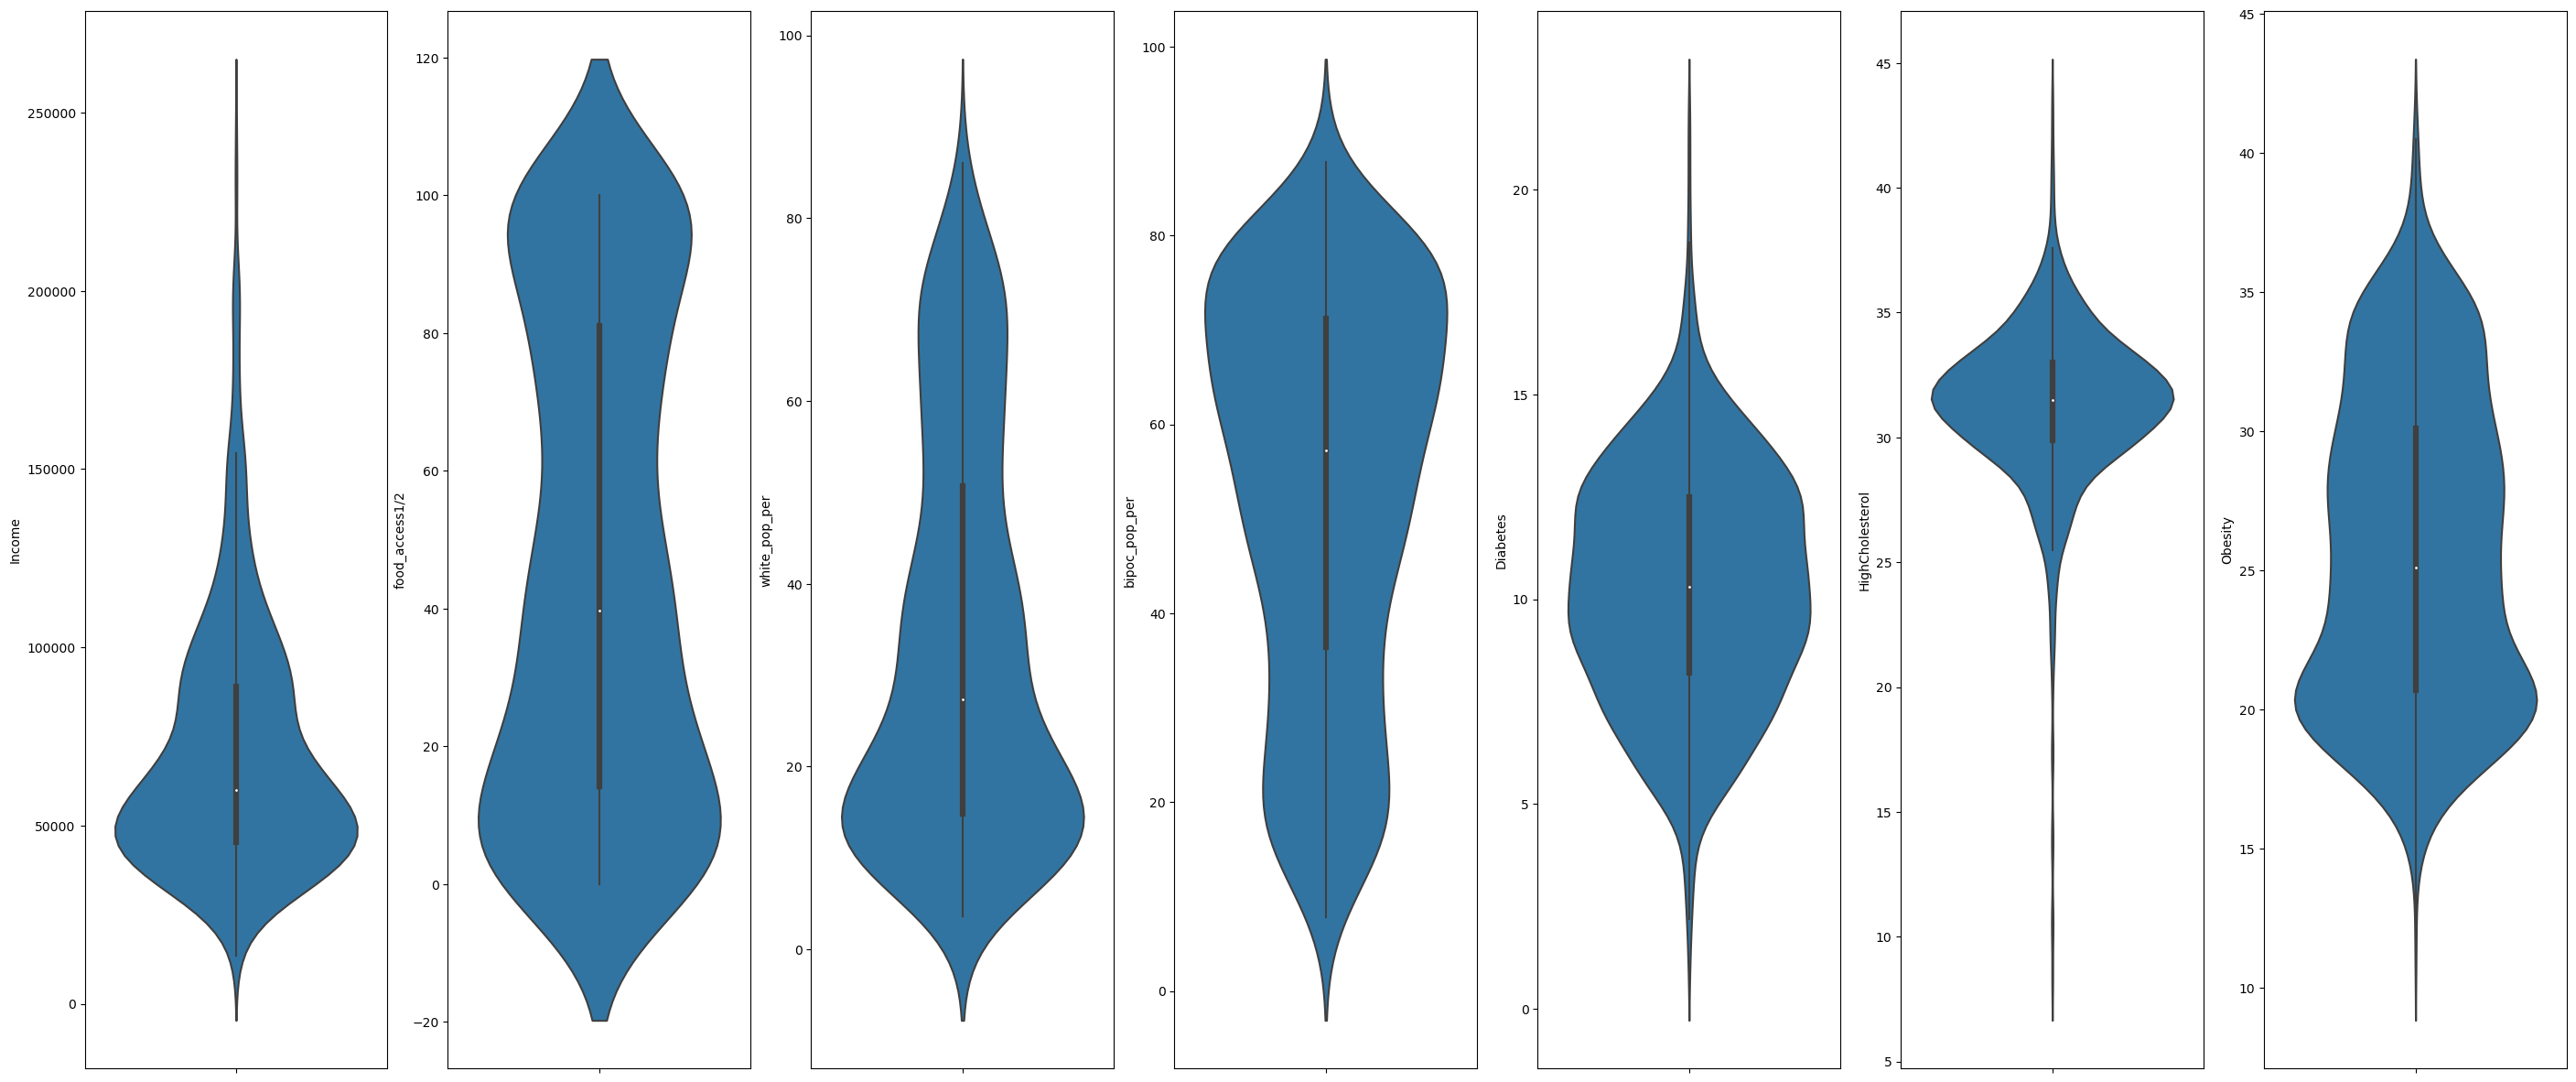

In [24]:
fig, ax=plt.subplots(1,7, figsize=(35,15))
x=sns.violinplot(data['Income'], ax=ax[0], y=data['Income'])
x=sns.violinplot(data['food_access1/2'], ax=ax[1], y=data['food_access1/2'])
x=sns.violinplot(data['white_pop_per'], ax=ax[2], y=data['white_pop_per'])
x=sns.violinplot(data['bipoc_pop_per'], ax=ax[3], y=data['bipoc_pop_per'])
x=sns.violinplot(data['Diabetes'], ax=ax[4], y=data['Diabetes'])
x=sns.violinplot(data['HighCholesterol'], ax=ax[5], y=data['HighCholesterol'])
x=sns.violinplot(data['Obesity'], ax=ax[6], y=data['Obesity'])
x=sns.set_context('paper', font_scale=1)

## Some exploratory analysis

In [25]:
#histplot-kdeplot of all variables

<AxesSubplot: xlabel='bipoc_pop_per', ylabel='Count'>

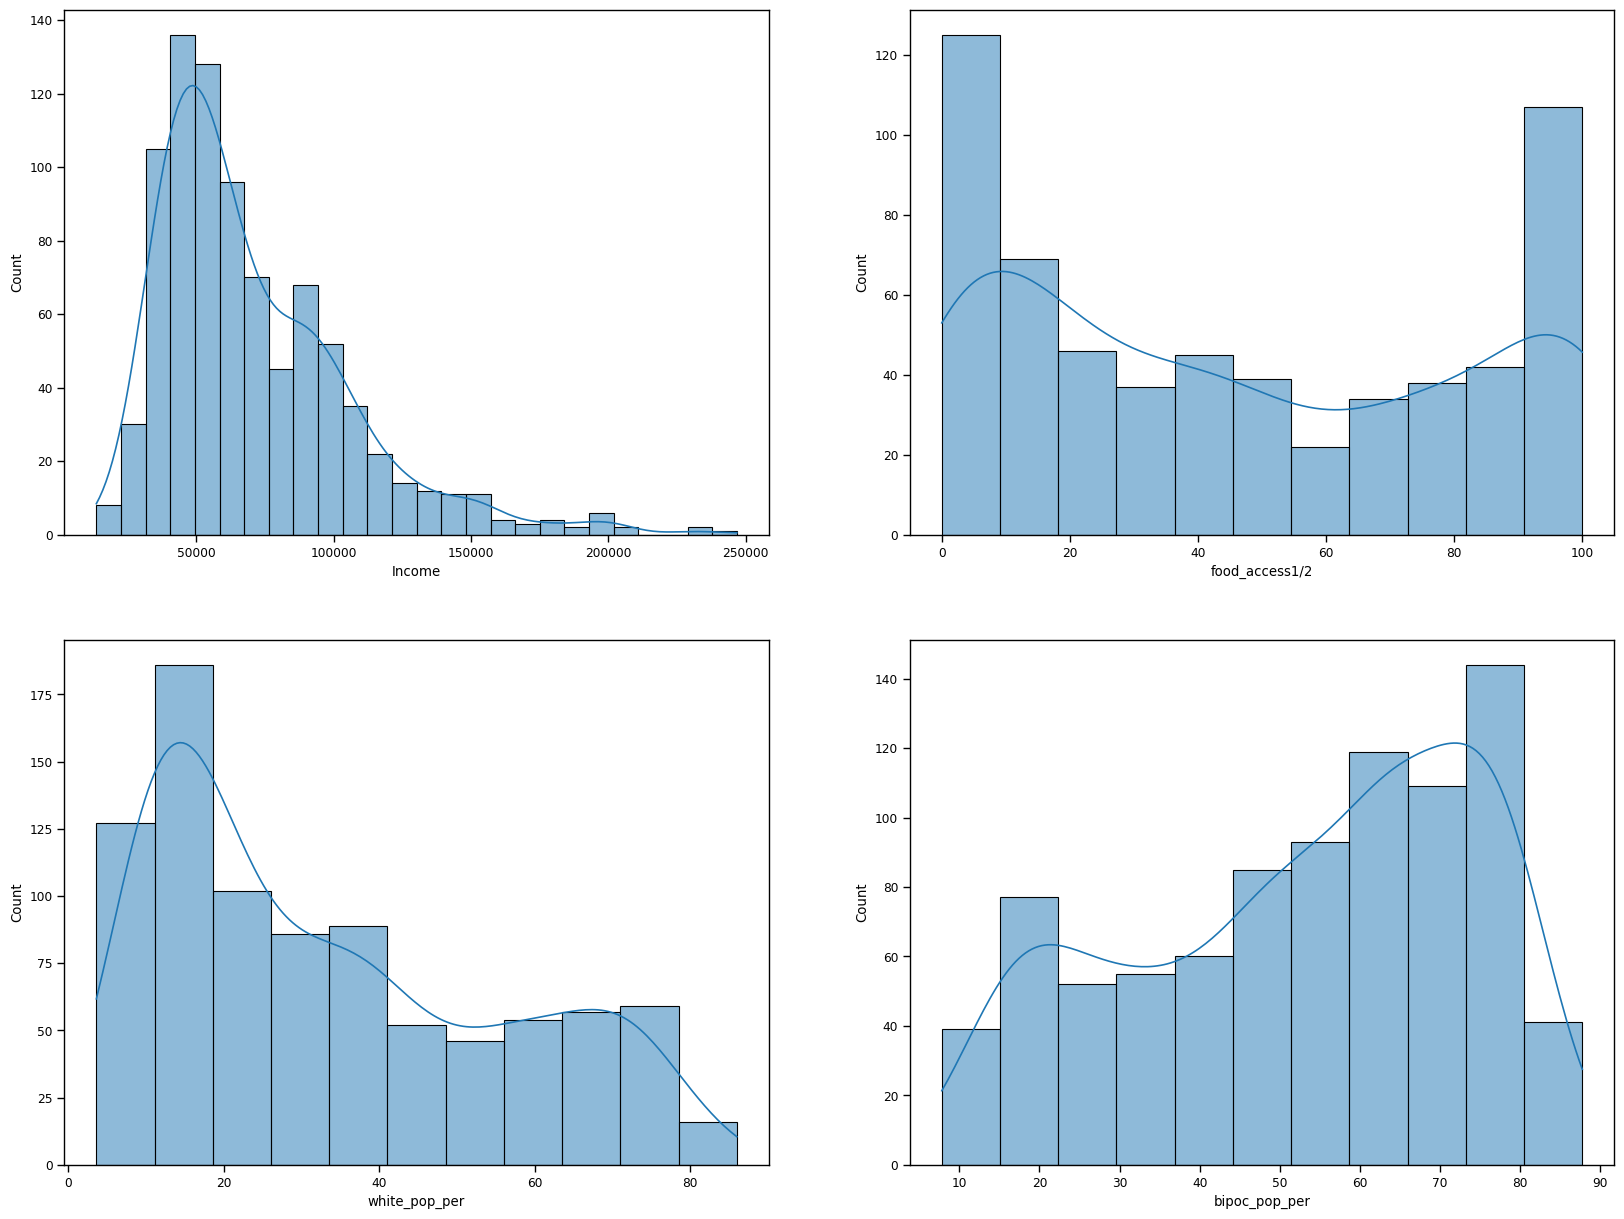

In [26]:
#histoplot of independent variables
fig, ax=plt.subplots(2,2, figsize=(20,15))
sns.histplot(data['Income'], kde=True, ax=ax[0,0])
sns.histplot(data['food_access1/2'], kde=True, ax=ax[0,1])
sns.histplot(data['white_pop_per'], kde=True, ax=ax[1,0])
sns.histplot(data['bipoc_pop_per'], kde=True, ax=ax[1,1])

<AxesSubplot: xlabel='Obesity', ylabel='Count'>

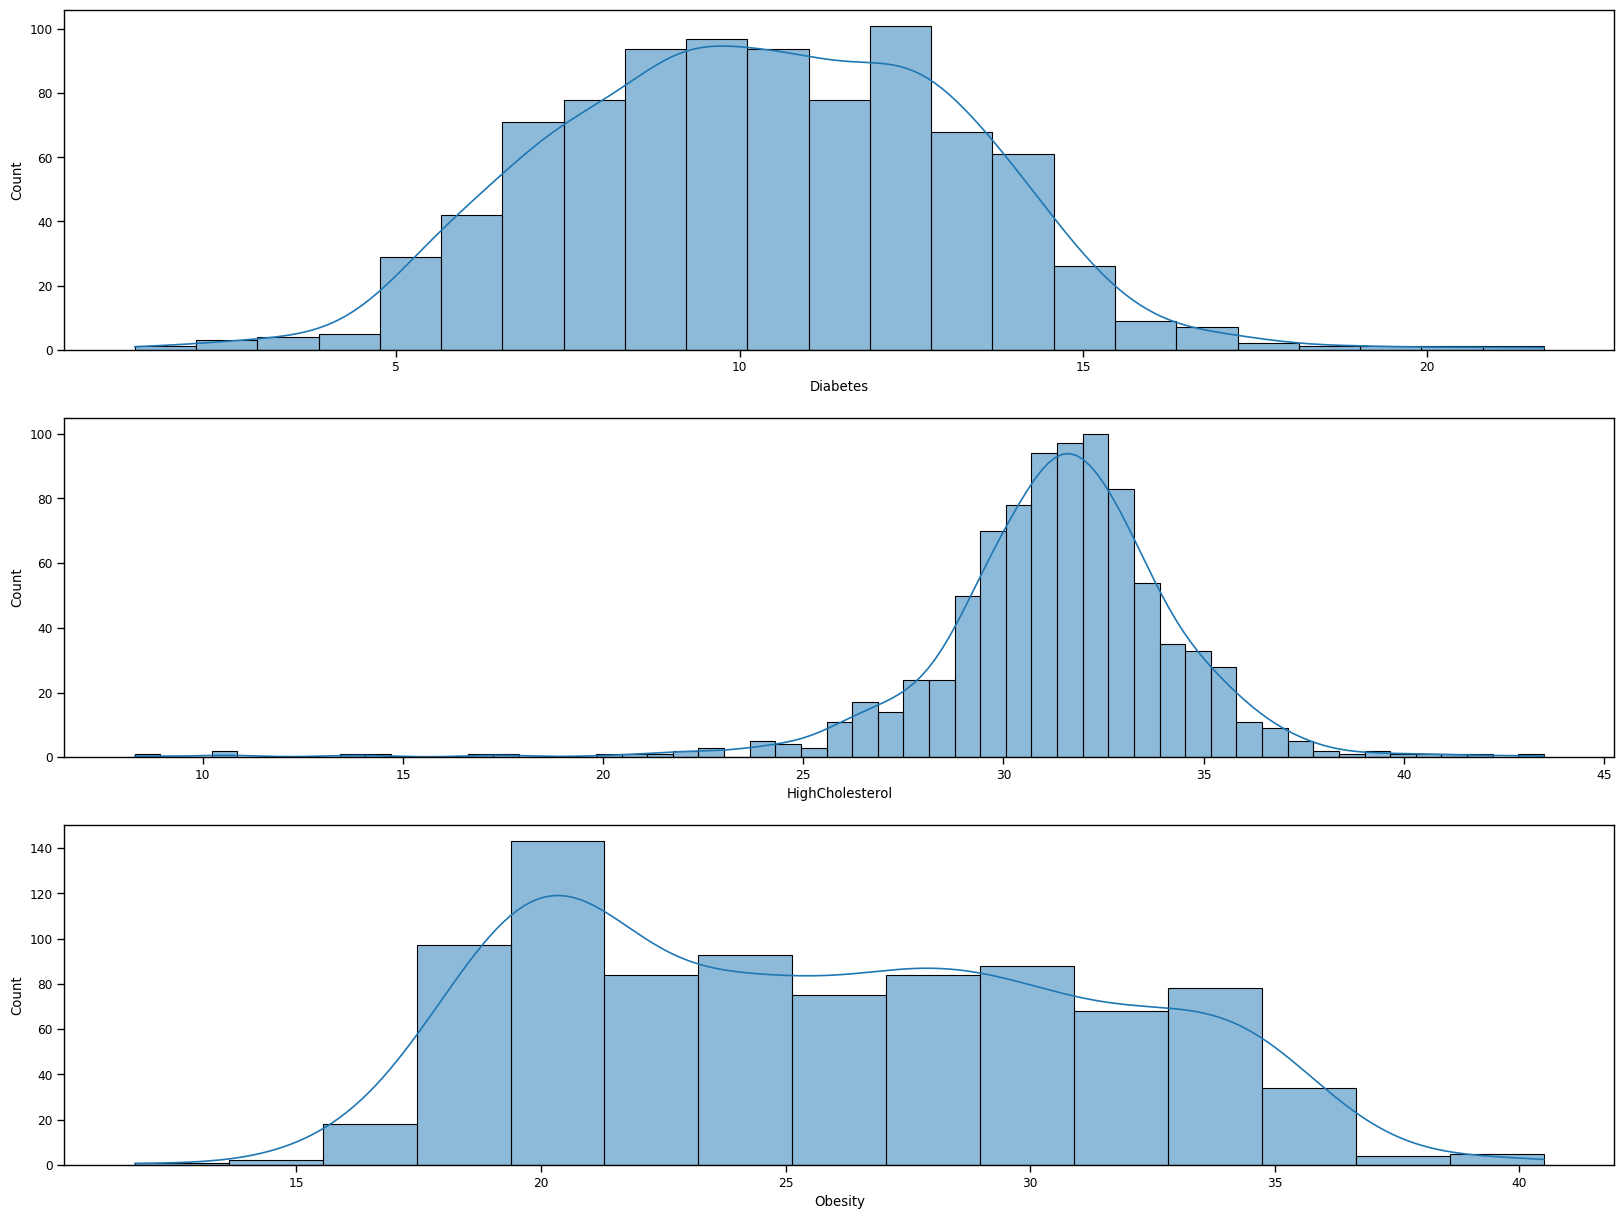

In [27]:
#histoplot of dependent variables
fig, ax=plt.subplots(3, figsize=(20,15))
sns.histplot(data['Diabetes'], kde=True, ax=ax[0])
sns.histplot(data['HighCholesterol'], kde=True, ax=ax[1])
sns.histplot(data['Obesity'], kde=True, ax=ax[2])

## Data visualizations showing any relevant distributions, comparisons, and/or correlations

Before starting the regression analysis, we decided to see how the grocery stores are distributed around the city of LA

In [28]:
grocery_data=pd.read_csv('Data/SNAP_location_LAcounty.csv') #for mapping
la_boundary=gpd.read_file('Data/City_Boundary/City_Boundary.shp') #for mapping

In [29]:
grocery_data['Geometry'] = gpd.points_from_xy(y=grocery_data['Latitude'], x=grocery_data['Longitude'])

In [30]:
grocery_data

X          Y                  Store_Name  \
0    -118.21718  33.936935          Richard's Liquor 1   
1    -118.46839  34.221004               El Progreso 4   
2    -117.80947  34.020035    New India Sweet & Spices   
3    -118.15609  33.918514                 Downey Mart   
4    -118.26552  34.001331           Almita Minimarket   
...         ...        ...                         ...   
6283 -118.11144  34.572594                  B-2 MARKET   
6284 -118.30030  33.949841        S M & B Liquors  Inc   
6285 -118.60612  34.168819     Amazon Go (Bowser) ILS2   
6286 -118.12604  33.997932  H & S Energy Products 2011   
6287 -118.09310  34.037750  H & S Energy Products 2014   

                              Address Address_Line__2            City State  \
0     3128 Martin Luther King Jr Blvd             NaN         Lynwood    CA   
1                 8257 Sepulveda Blvd             NaN   Panorama City    CA   
2              303 S Diamond Bar Blvd           Ste E     Diamond Bar    CA   
3                13000 Paramount Blvd             NaN          Downey    CA   
4                    4611 Avalon Blvd             NaN     Los Angeles    CA   
...                               ...             ...             ...   ...   
6283                  1002 E Avenue R             NaN        Palmdale    CA   
6284             9467 S Normandie Ave             NaN     Los Angeles    CA   
6285               22001 Ventura Blvd             NaN  Woodland Hills    CA   
6286             1628 Washington Blvd             NaN      Montebello    CA   
6287              1600 Paramount Blvd             NaN      Montebello    CA   

       Zip5  Zip4       County  Longitude   Latitude  ObjectId  \
0     90262  1832  LOS ANGELES -118.21718  33.936935       102   
1     91402  4306  LOS ANGELES -118.46839  34.221004       118   
2     91765  1613  LOS ANGELES -117.80947  34.020035       169   
3     90242  4330  LOS ANGELES -118.15609  33.918514       192   
4     90011  5453  LOS ANGELES -118.26552  34.001331       230   
...     ...   ...          ...        ...        ...       ...   
6283  93550  5326  LOS ANGELES -118.11144  34.572594    251818   
6284  90044  1947  LOS ANGELES -118.30030  33.949841    251820   
6285  91364  1646  LOS ANGELES -118.60612  34.168819    251858   
6286  90640  5422  LOS ANGELES -118.12604  33.997932    251859   
6287  90640  2134  LOS ANGELES -118.09310  34.037750    251860   

                         Geometry  
0     POINT (-118.21718 33.93693)  
1     POINT (-118.46839 34.22100)  
2     POINT (-117.80947 34.02004)  
3     POINT (-118.15609 33.91851)  
4     POINT (-118.26552 34.00133)  
...                           ...  
6283  POINT (-118.11144 34.57259)  
6284  POINT (-118.30030 33.94984)  
6285  POINT (-118.60612 34.16882)  
6286  POINT (-118.12604 33.99793)  
6287  POINT (-118.09310 34.03775)  

[6288 rows x 14 columns]

In [31]:
grocery=gpd.GeoDataFrame(grocery_data, geometry='Geometry')

<AxesSubplot: >

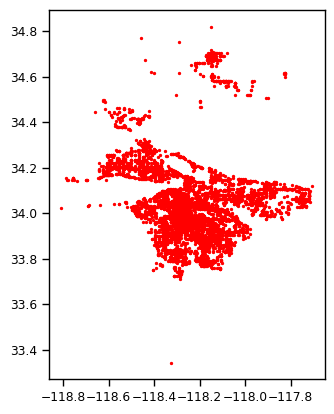

In [32]:
grocery.plot(aspect=1, marker='.', markersize=10, color='red')

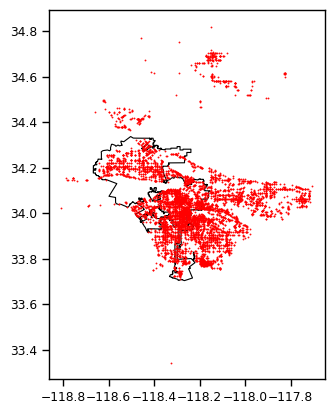

In [33]:
basemap = la_boundary.plot(edgecolor='black', facecolor='none')
basemap = grocery.plot(ax=basemap, marker='.', markersize=1, color='red', aspect=1)

In [34]:
grocery.crs='EPSG:4326'

In [35]:
x=gpd.sjoin(grocery, la_boundary, how='inner', op='within')

/Users/motokoushou/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [36]:
x

X          Y                  Store_Name  \
1    -118.46839  34.221004               El Progreso 4   
4    -118.26552  34.001331           Almita Minimarket   
6    -118.30669  34.057621            Oxford Mini Mart   
10   -118.30407  34.011013           Mlk Gas Station 0   
12   -118.60590  34.180840         United Pacific 0223   
...         ...        ...                         ...   
6268 -118.42083  34.030910  H & S Energy Products 2062   
6271 -118.32671  33.985126                  8th Liquor   
6275 -118.48319  34.155983              Woodley Market   
6279 -118.29137  33.957527                   Quickmart   
6285 -118.60612  34.168819     Amazon Go (Bowser) ILS2   

                                Address Address_Line__2            City State  \
1                   8257 Sepulveda Blvd             NaN   Panorama City    CA   
4                      4611 Avalon Blvd             NaN     Los Angeles    CA   
6                         3502 W 8th St             NaN     Los Angeles    CA   
10    1515 W Martin Luther King Jr Blvd             NaN     Los Angeles    CA   
12             6061 Topanga Canyon Blvd             NaN  Woodland Hills    CA   
...                                 ...             ...             ...   ...   
6268                10815 National Blvd             NaN     Los Angeles    CA   
6271                       6007 8th Ave             NaN     Los Angeles    CA   
6275                 16060 Ventura Blvd         Ste 101          Encino    CA   
6279                 8816 S Vermont Ave             NaN     Los Angeles    CA   
6285                 22001 Ventura Blvd             NaN  Woodland Hills    CA   

       Zip5  Zip4       County  Longitude   Latitude  ObjectId  \
1     91402  4306  LOS ANGELES -118.46839  34.221004       118   
4     90011  5453  LOS ANGELES -118.26552  34.001331       230   
6     90005  2902  LOS ANGELES -118.30669  34.057621       286   
10    90062  1743  LOS ANGELES -118.30407  34.011013       537   
12    91367  3626  LOS ANGELES -118.60590  34.180840       777   
...     ...   ...          ...        ...        ...       ...   
6268  90064  4111  LOS ANGELES -118.42083  34.030910    251333   
6271  90043  4007  LOS ANGELES -118.32671  33.985126    251484   
6275  91436  4420  LOS ANGELES -118.48319  34.155983    251534   
6279  90044  4832  LOS ANGELES -118.29137  33.957527    251593   
6285  91364  1646  LOS ANGELES -118.60612  34.168819    251858   

                         Geometry  index_right  OBJECTID CITY  
1     POINT (-118.46839 34.22100)            0         1   IN  
4     POINT (-118.26552 34.00133)            0         1   IN  
6     POINT (-118.30669 34.05762)            0         1   IN  
10    POINT (-118.30407 34.01101)            0         1   IN  
12    POINT (-118.60590 34.18084)            0         1   IN  
...                           ...          ...       ...  ...  
6268  POINT (-118.42083 34.03091)            0         1   IN  
6271  POINT (-118.32671 33.98513)            0         1   IN  
6275  POINT (-118.48319 34.15598)            0         1   IN  
6279  POINT (-118.29137 33.95753)            0         1   IN  
6285  POINT (-118.60612 34.16882)            0         1   IN  

[2533 rows x 17 columns]

<AxesSubplot: >

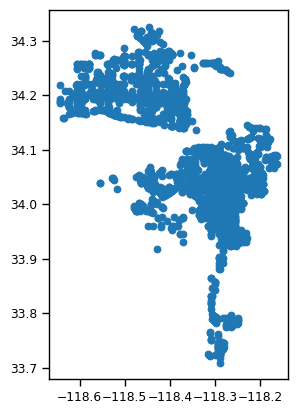

In [37]:
x.plot()

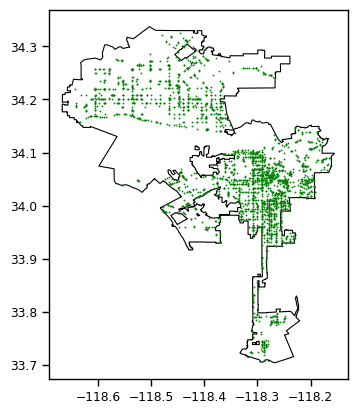

In [38]:
basemap = la_boundary.plot(edgecolor='black', facecolor='none')
basemap = x.plot(ax=basemap, marker='.', markersize=1, color='green', aspect=1)

Created a folium map to show the shop locations in a real map and to zoom in-out the map to understand the actual location.

In [39]:
import folium
m = la_boundary.explore(color='green')
m

In [40]:
popup=x['Store_Name']
popup[1]

'El Progreso 4'

In [41]:
for i in range(len(x['Geometry'])):
    folium.Marker(location=[x.iloc[i]['Latitude'], x.iloc[i]['Longitude']],
                  tooltip='Grocery Store').add_to(m)

Added popups to show the coordinates of the grocery stores when you click on the markers

In [42]:
m.add_child(folium.LatLngPopup())

Also created a choropleth map to find the distribution of each variables

In [43]:
#choropleth map

In [44]:
var=['Income','food_access1/2', 'white_pop_per', 'bipoc_pop_per']
var

['Income', 'food_access1/2', 'white_pop_per', 'bipoc_pop_per']

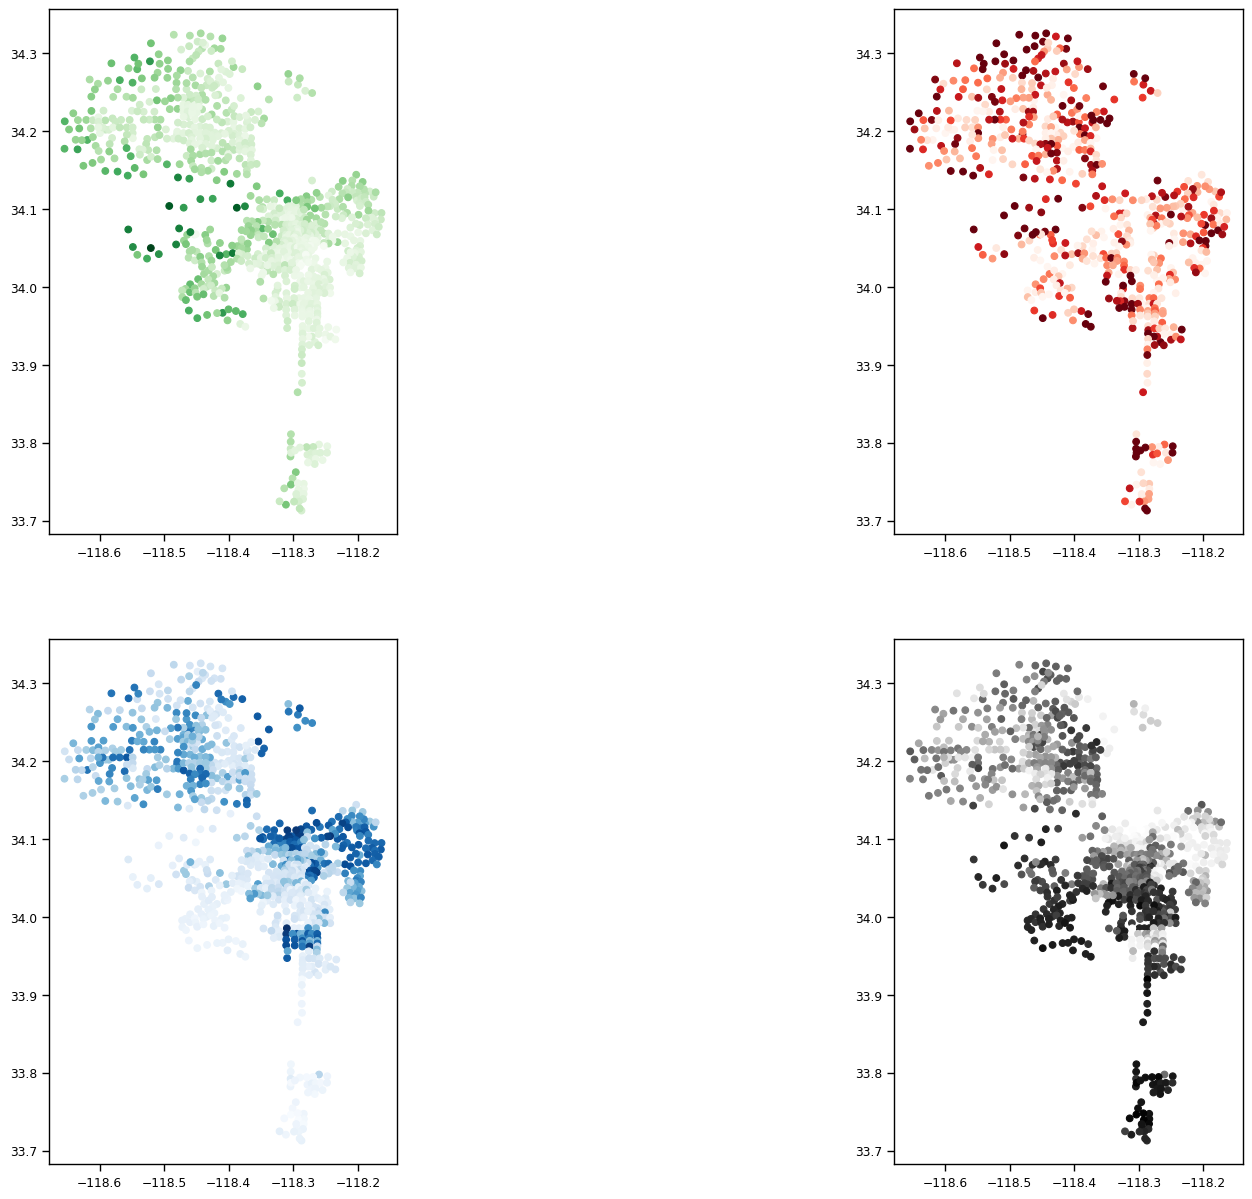

In [45]:
fig, ax=plt.subplots(2,2, figsize=(20,15))
data.plot(column='Income', cmap='Greens', ax=ax[0,0])
data.plot(column='food_access1/2', cmap='Reds', ax=ax[0,1])
data.plot(column='white_pop_per', cmap='Blues', ax=ax[1,0])
data.plot(column='bipoc_pop_per', cmap='Greys', ax=ax[1,1])

plt.show()

In [46]:
#correlation plot

In [47]:
var=['Income','food_access1/2', 'white_pop_per', 'bipoc_pop_per']
var

['Income', 'food_access1/2', 'white_pop_per', 'bipoc_pop_per']

To check correlation between the variables, we created a heat map

In [48]:
data_cor=data[var]
data_cor

Income  food_access1/2  white_pop_per  bipoc_pop_per
0     74625.0           73.17      62.220869      26.796590
1     93125.0           99.91      73.041845      18.079399
2     55682.0           76.94      56.848086      31.877990
3     87066.0           17.61      58.333333      31.707317
4     66210.0           63.57      55.235043      33.974359
..        ...             ...            ...            ...
869   74567.0           69.27       9.675019      76.432647
870  128068.0            2.26       7.178146      79.715199
871   70729.0           59.95      11.346089      71.668345
872   59047.0          100.00      10.352021      77.392438
873   78276.0          100.00       9.629429      77.846903

[874 rows x 4 columns]

<AxesSubplot: >

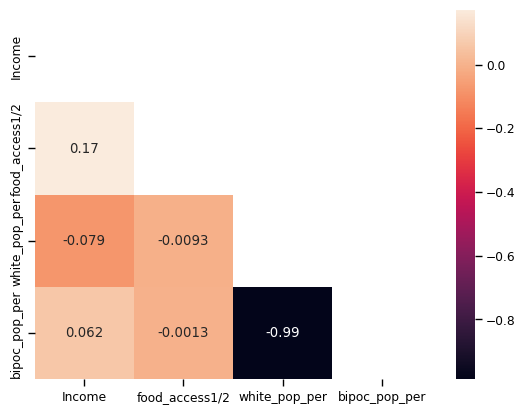

In [49]:
df=data_cor.corr()
mask = np.zeros_like(df, dtype=float)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, annot=True, mask=mask)

We also draw correlation plot

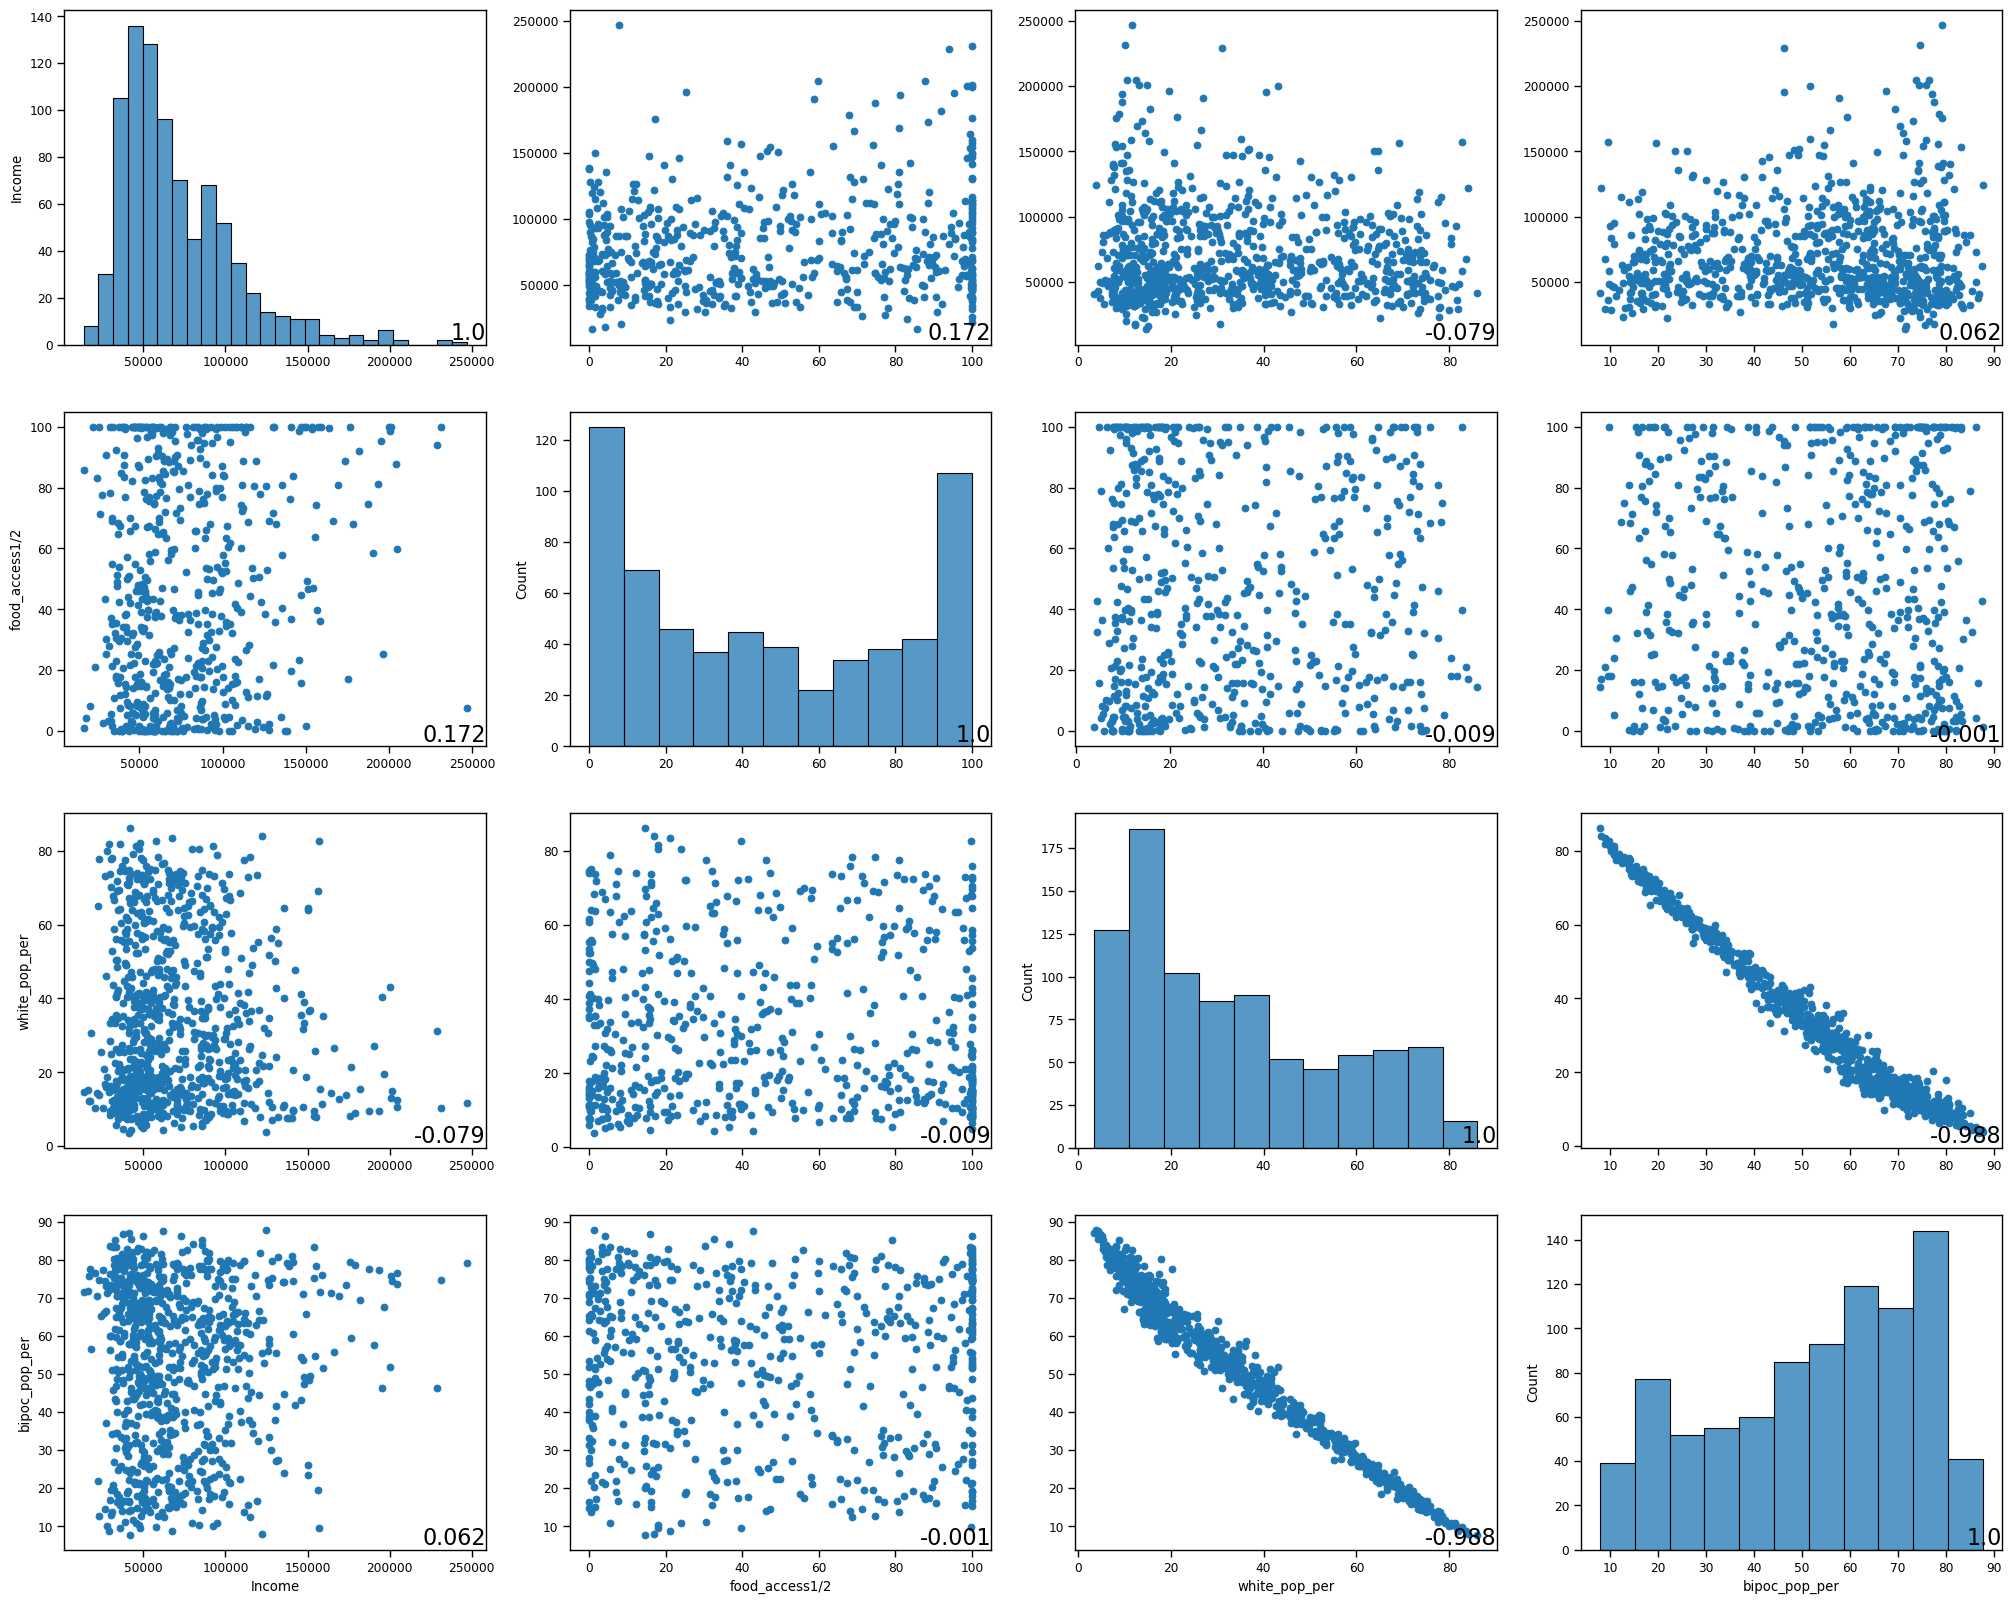

In [50]:
corr_feature=data[var].corr()
fig=plt.figure(figsize=(25,20))
n_feature=len(var)
for i in range(n_feature):
    for j in range(n_feature):
        ax=fig.add_subplot(n_feature, n_feature, i*n_feature+j+1)
        if i==j:
            sns.histplot(data[var[i]].values)
        else:
            plt.scatter(var[j], var[i], data=data)
            
        if i==n_feature-1:
            plt.xlabel(var[j])
        if j==0:
            plt.ylabel(var[i])
        ax.annotate(np.round(corr_feature.loc[var[i], var[j]],3),xy=(1,0),
                    xycoords='axes fraction', fontsize=16, horizontalalignment='right', verticalalignment='bottom')

plt.show()

There exists a correaltion between white_pop_per and bipoc_pop_per.
For the regression analysis, we will use only bipoc_pop_per, not both white_pop_per and bipoc_pop_per.

## A statistical model, such as a difference-of- means test, or a linear regression model

We scaled the variables from 0 to 1 to not confuse the computer before the analysis.

In [51]:
#scale 'Income', 'Food Access', 'BIPOC pop' data
sc_income=(data['Income']-data['Income'].min())/(data['Income'].max()-data['Income'].min())
sc_foodaccess=(data['food_access1/2']-data['food_access1/2'].min())/(data['food_access1/2'].max()-data['food_access1/2'].min())
sc_bipoc=(data['bipoc_pop_per']-data['bipoc_pop_per'].min())/(data['bipoc_pop_per'].max()-data['bipoc_pop_per'].min())
print(sc_income, sc_foodaccess, sc_bipoc)

0      0.261646
1      0.341005
2      0.180388
3      0.315014
4      0.225549
         ...   
869    0.261398
870    0.490897
871    0.244934
872    0.194822
873    0.277308
Name: Income, Length: 874, dtype: float64 0      0.7317
1      0.9991
2      0.7694
3      0.1761
4      0.6357
        ...  
869    0.6927
870    0.0226
871    0.5995
872    1.0000
873    1.0000
Name: food_access1/2, Length: 874, dtype: float64 0      0.237401
1      0.128315
2      0.300989
3      0.298854
4      0.327223
         ...   
869    0.858543
870    0.899620
871    0.798923
872    0.870553
873    0.876241
Name: bipoc_pop_per, Length: 874, dtype: float64


In [52]:
#scale 'Diabetes', 'High Cholesterol', 'Obesity' data
sc_diabetes=(data['Diabetes']-data['Diabetes'].min())/(data['Diabetes'].max()-data['Diabetes'].min())
sc_highchol=(data['HighCholesterol']-data['HighCholesterol'].min())/(data['HighCholesterol'].max()-data['HighCholesterol'].min())
sc_obesity=(data['Obesity']-data['Obesity'].min())/(data['Obesity'].max()-data['Obesity'].min())
print(sc_diabetes, sc_highchol, sc_obesity)

0      0.409756
1      0.346341
2      0.463415
3      0.375610
4      0.400000
         ...   
869    0.390244
870    0.321951
871    0.424390
872    0.331707
873    0.375610
Name: Diabetes, Length: 874, dtype: float64 0      0.724432
1      0.732955
2      0.747159
3      0.772727
4      0.761364
         ...   
869    0.701705
870    0.673295
871    0.875000
872    0.636364
873    0.707386
Name: HighCholesterol, Length: 874, dtype: float64 0      0.454861
1      0.315972
2      0.517361
3      0.354167
4      0.409722
         ...   
869    0.451389
870    0.350694
871    0.312500
872    0.472222
873    0.440972
Name: Obesity, Length: 874, dtype: float64


In [53]:
scaled_data=pd.DataFrame()
scaled_data['sc_income']=sc_income
scaled_data['sc_foodaccess']=sc_foodaccess
scaled_data['sc_bipoc']=sc_bipoc
scaled_data['sc_diabetes']=sc_diabetes
scaled_data['sc_highchol']=sc_highchol
scaled_data['sc_obesity']=sc_obesity
scaled_data

sc_income  sc_foodaccess  sc_bipoc  sc_diabetes  sc_highchol  sc_obesity
0     0.261646         0.7317  0.237401     0.409756     0.724432    0.454861
1     0.341005         0.9991  0.128315     0.346341     0.732955    0.315972
2     0.180388         0.7694  0.300989     0.463415     0.747159    0.517361
3     0.315014         0.1761  0.298854     0.375610     0.772727    0.354167
4     0.225549         0.6357  0.327223     0.400000     0.761364    0.409722
..         ...            ...       ...          ...          ...         ...
869   0.261398         0.6927  0.858543     0.390244     0.701705    0.451389
870   0.490897         0.0226  0.899620     0.321951     0.673295    0.350694
871   0.244934         0.5995  0.798923     0.424390     0.875000    0.312500
872   0.194822         1.0000  0.870553     0.331707     0.636364    0.472222
873   0.277308         1.0000  0.876241     0.375610     0.707386    0.440972

[874 rows x 6 columns]

As the data is ready, we will do a regression analysis using OLS.

We first did single regression between health issues and food_access.

In [54]:
#1. Diabetes
response='sc_diabetes'
predictor='sc_foodaccess'
regression_data=scaled_data[[response, predictor]].dropna()
X=regression_data[predictor]
y=regression_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_diabetes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2922
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.589
Time:                        19:18:26   Log-Likelihood:                 358.66
No. Observations:                 604   AIC:                            -713.3
Df Residuals:                     602   BIC:                            -704.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4331      0.009     48.267

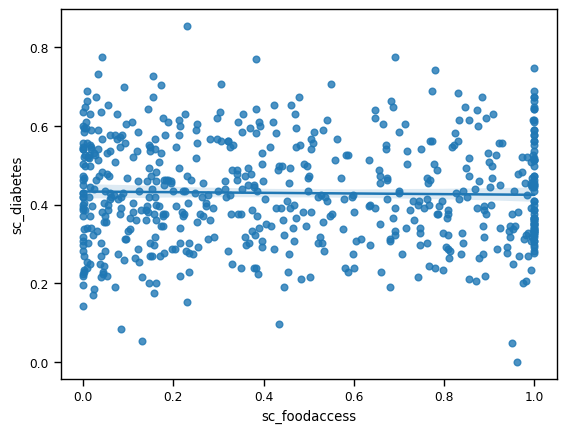

In [55]:
ax = sns.regplot(x=X, y=y)

In [56]:
response='sc_highchol'
predictor='sc_foodaccess'
regression_data=scaled_data[[response, predictor]].dropna()
X=regression_data[predictor]
y=regression_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_highchol   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.77
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           0.000226
Time:                        19:18:26   Log-Likelihood:                 608.84
No. Observations:                 604   AIC:                            -1214.
Df Residuals:                     602   BIC:                            -1205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6436      0.006    108.546

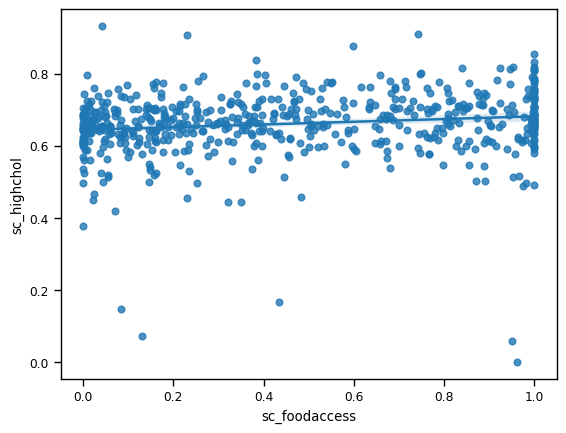

In [57]:
ax = sns.regplot(x=X, y=y)

In [58]:
response='sc_obesity'
predictor='sc_foodaccess'
regression_data=scaled_data[[response, predictor]].dropna()
X=regression_data[predictor]
y=regression_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             sc_obesity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.411
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.121
Time:                        19:18:27   Log-Likelihood:                 130.61
No. Observations:                 604   AIC:                            -257.2
Df Residuals:                     602   BIC:                            -248.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4871      0.013     37.220

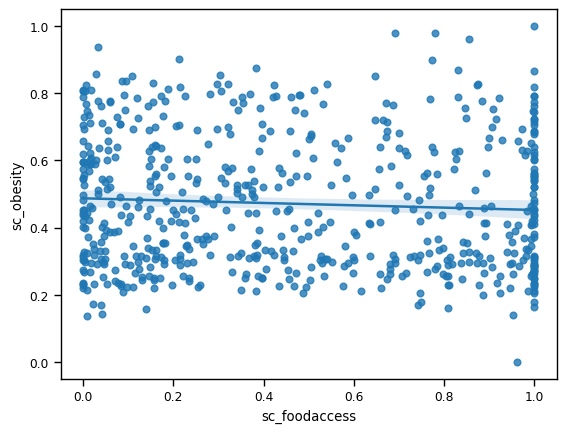

In [59]:
ax = sns.regplot(x=X, y=y)

Looking into the R-squared value of the simple regression of all three health issues above, as they are very low, it seems like we were missing variables that affect the result(health issues)
: Omitted-Variable Bias(OVB)

Then we included other variables to figure out they affect the health issues.

In [60]:
#multiple-regression

In [61]:
#1. diabetes
response=['sc_diabetes']
predictors=['sc_income', 'sc_bipoc', 'sc_foodaccess']
multi_data=scaled_data[response+predictors].dropna()
X=multi_data[predictors]
y=multi_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_diabetes   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.55e-67
Time:                        19:18:29   Log-Likelihood:                 522.81
No. Observations:                 597   AIC:                            -1038.
Df Residuals:                     593   BIC:                            -1020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5540      0.013     43.850

Because the bipoc population seem to be not related to the diabetes, we did a multiple regression with only income and food access variables.

In [62]:
#1 -(1) diabetes/income+food_access
response=['sc_diabetes']
predictors=['sc_income', 'sc_foodaccess']
multi_data=scaled_data[response+predictors].dropna()
X=multi_data[predictors]
y=multi_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_diabetes   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     204.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.14e-68
Time:                        19:18:31   Log-Likelihood:                 522.50
No. Observations:                 597   AIC:                            -1039.
Df Residuals:                     594   BIC:                            -1026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5608      0.009     60.465

Even without the bipoc, the R-squared value did not seem to improve. However, it still is over 0.4 and the income and food access variables both turned out to be meaningful.

The equation looks like below.

Diabetes=0.5608-0.5284*income+0.039*food_access

In [1081]:
#2. high cholesterol
response=['sc_highchol']
predictors=['sc_income', 'sc_bipoc', 'sc_foodaccess']
multi_data=scaled_data[response+predictors].dropna()
X=multi_data[predictors]
y=multi_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_highchol   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     20.68
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           9.33e-13
Time:                        15:55:41   Log-Likelihood:                 709.60
No. Observations:                 597   AIC:                            -1411.
Df Residuals:                     593   BIC:                            -1394.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6260      0.009     67.747

Because the bipoc population seem to be not related to the high cholesterol, we did a multiple regression with only income and food access variables.

In [1082]:
#2 -(1) high cholesterol
response=['sc_highchol']
predictors=['sc_income', 'sc_foodaccess']
multi_data=scaled_data[response+predictors].dropna()
X=multi_data[predictors]
y=multi_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sc_highchol   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     29.79
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.70e-13
Time:                        15:55:41   Log-Likelihood:                 708.43
No. Observations:                 597   AIC:                            -1411.
Df Residuals:                     594   BIC:                            -1398.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6164      0.007     90.752

The equation looks like below.

HighCholesterol=0.6164+0.1163*income+0.0316*food_access

However, as the R-squared value is very low, the equation doesn't seem to be very significant.

In [1083]:
#3. obesity
response=['sc_obesity']
predictors=['sc_income', 'sc_bipoc', 'sc_foodaccess']
multi_data=scaled_data[response+predictors].dropna()
X=multi_data[predictors]
y=multi_data[response]
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             sc_obesity   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           9.41e-90
Time:                        15:55:41   Log-Likelihood:                 340.35
No. Observations:                 597   AIC:                            -672.7
Df Residuals:                     593   BIC:                            -655.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6526      0.017     38.048

In terms of obesity, the equation looks like below.

Obesity=0.6526-0.8642*income+0.0747*bipoc+0.0414*food_access.


### Authors (Contribution)

Youngseo Kweon: Created python notebook as whole referencing class materials and previous group works

Brigitte Rodriguez: 
 
Angelyn Mendoza: 
 
Gabby Magana: 
 
Clark Hong-Sheng Hsu:

